# Pré-processamento

In [1]:
import tensorflow as tf
# Importante verificar a compatibilidade caso queira carregar o modelo pré/semi treinado
print(tf.__version__)

2.16.1


In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [3]:
IMG_SIZE = 64
IMG_CHANNELS = 3
BATCH_SIZE = 64
PATH="/kaggle/input/animefacedataset"

In [4]:
dataset = tf.keras.utils.image_dataset_from_directory(
    PATH,
    labels=None,
    image_size=(IMG_SIZE, IMG_SIZE),  # Tamanho para redimensionar as imagens
    batch_size=BATCH_SIZE,            # Tamanho do batch (subconjunto do dataset)
    shuffle=True,                     # Embaralhar as imagens
    seed=42                           # Para resultados reprodutíveis
)

Found 63565 files.


In [5]:
@tf.function
def normalize_image(image):
    """
    Função para normalizar a imagem para o intervalo [-1, 1]
    Args:
        image (tf.Tensor): Imagem para ser normalizada.
    """
    image = tf.cast(image, tf.float32)  # Certifica-se de que os pixels são do tipo float32
    image = (image / 255.0) * 2 - 1     # Converte o intervalo [0, 1] para [-1, 1]

    return image

In [6]:
AUTOTUNE = tf.data.experimental.AUTOTUNE

dataset = dataset.map(normalize_image)    # Aplicação da função de normalização
dataset = dataset.prefetch(BATCH_SIZE*2)  # Prefetch para otimizar a leitura de dados

(64, 64, 64, 3)
(64, 64, 3)


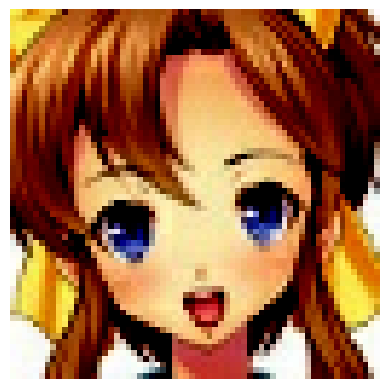

-0.8942148 1.0


In [7]:
for i in dataset:
    print(i.shape)
    print(i[0].shape)

    plt.imshow(i[0])
    plt.axis('off')
    plt.show()

    print(np.min(i[0]), np.max(i[0]))
    break


# Treinamento e Instanciação da GAN

In [ ]:
from dcgan_model import GAN, build_generator, build_discriminator

In [10]:
gan = GAN(build_generator, build_discriminator, EPOCHS=100, NOISE_DIM=100, BATCH_SIZE=BATCH_SIZE, GEN_LR=0.0001, DISC_LR=0.0001)

/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 16384)          │     1,654,784 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 16384)          │        65,536 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu (LeakyReLU)         │ (None, 16384)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape (Reshape)               │ (None, 4, 4, 1024)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose                │ (None, 8, 8, 512)      │     4,718,592 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 8, 8, 512)      │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_1 (LeakyReLU)       │ (None, 8, 8, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_1              │ (None, 16, 16, 256)    │     1,179,648 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 16, 16, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_2 (LeakyReLU)       │ (None, 16, 16, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_2              │ (None, 32, 32, 128)    │       294,912 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 32, 32, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_3 (LeakyReLU)       │ (None, 32, 32, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_3              │ (None, 64, 64, 64)     │        73,728 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_4 (LeakyReLU)       │ (None, 64, 64, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_4              │ (None, 64, 64, 3)      │         1,731 │
│ (Conv2DTranspose)               │                        │               │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,992,515 (30.49 MB)

 Trainable params: 7,957,955 (30.36 MB)

 Non-trainable params: 34,560 (135.00 KB)

/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/input_layer.py:25: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 32, 32, 128)    │         3,456 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 32, 32, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_5 (LeakyReLU)       │ (None, 32, 32, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 16, 16, 256)    │       294,912 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 16, 16, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_6 (LeakyReLU)       │ (None, 16, 16, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 16, 16, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 8, 8, 512)      │     1,179,648 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 8, 8, 512)      │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_7 (LeakyReLU)       │ (None, 8, 8, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 8, 8, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 4, 4, 1024)     │     4,718,592 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_8 (LeakyReLU)       │ (None, 4, 4, 1024)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 16384)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │        16,385 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,216,577 (23.71 MB)

 Trainable params: 6,214,785 (23.71 MB)

 Non-trainable params: 1,792 (7.00 KB)

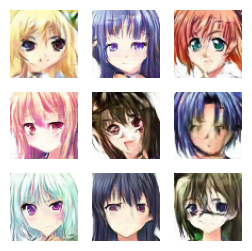

In [11]:
gan.train(dataset, epochs=100, epoch_to_adjust_lr=5, epochs_checkpoint=10, epochs_to_extra_step=2)

# Resultados

## Imagens geradas

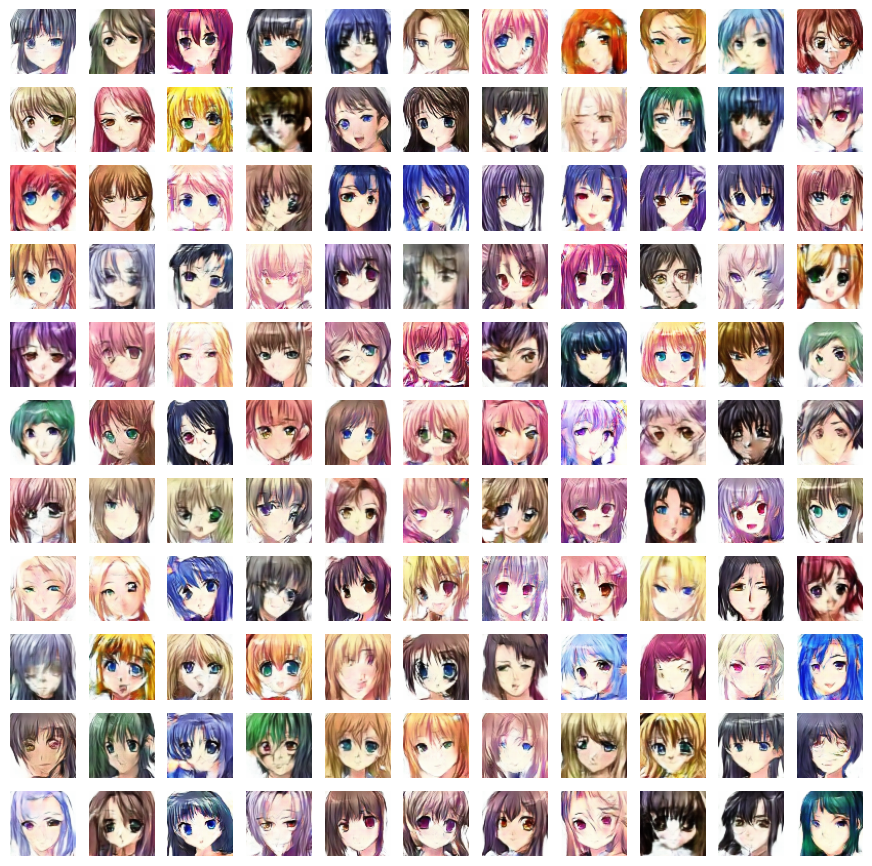

Imagem salva em:  generated_images


In [38]:
gan.generate_and_save_images(num_images=128, path='', epoch=0, name='generated_images.png', verbose=True)

In [16]:
# Exibição de cada imagem individualmente pela sua época
def display_image(epoch_no):
    return PIL.Image.open(f'images/image_at_epoch_{epoch_no}.png')

In [19]:
import imageio
import glob

In [21]:
# Gerando o GIF
anim_file = 'image_per_epoch.gif'

with imageio.get_writer(anim_file, mode='I') as writer:
    filenames = glob.glob('generated_images/image*.png')
    filenames = sorted(filenames)
    for filename in filenames:
        image = imageio.imread(filename)
        writer.append_data(image)
    image = imageio.imread(filename)
    writer.append_data(image)

/tmp/ipykernel_30/3058896697.py:8: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imageio.imread(filename)
/tmp/ipykernel_30/3058896697.py:10: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imageio.imread(filename)


In [ ]:
import tensorflow_docs.vis.embed as embed
embed.embed_file(anim_file)

## Gráfico das métricas

In [22]:
metrics = {i: [float(np.mean(j)) for j in gan.history[i]] for i in gan.history}
metrics['total_loss'] = [i + j for i, j in zip(metrics['generator_loss'], metrics['discriminator_loss'])]

discriminator_loss
discriminator_accuracy
generator_loss
generator_accuracy
total_loss


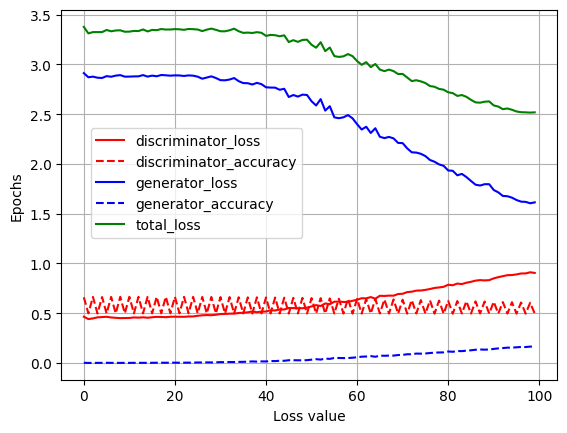

In [34]:
plt.figure("GAN metrics")
plt.grid()

lines = ['r', 'r--', 'b', 'b--', 'g']
for i, j in zip(metrics, lines):
    print(i)
    plt.plot(range(gan.EPOCHS), metrics[i], j)

plt.xlabel('Loss value')
plt.ylabel('Epochs')

plt.legend(metrics.keys(), loc="upper right", bbox_to_anchor=(0.5, 0.7))

plt.savefig("anime_face_gan_metrics.png")

plt.show()

In [36]:
import json

In [37]:
# Serialização das métricas
with open('gan_metrics.json', 'w') as f:
    json.dump(metrics, f)